In [1]:
from sklearn.datasets import load_breast_cancer
import torch
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [4]:
features, target = cancer.data, cancer.target

In [5]:
features.shape, target.shape

((569, 30), (569,))

In [6]:
features.mean(0), features.std(0)

(array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
        9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
        1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
        2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
        3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
        1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
        1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
        2.90075571e-01, 8.39458172e-02]),
 array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
        1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
        2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
        2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
        3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
        4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
        2.28123569e-02

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


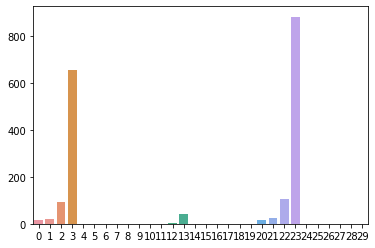

In [7]:
sns.barplot(list(range(30)), features.mean(0))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


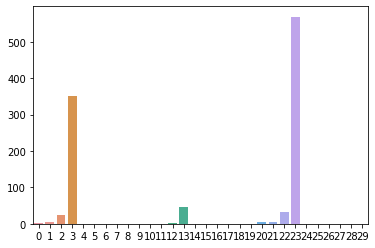

In [8]:
sns.barplot(list(range(30)), features.std(0))

In [9]:
scalar = StandardScaler()
features = scalar.fit_transform(features)

In [10]:
features.mean(0), features.std(0)

(array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
         6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
        -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
         1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
         7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
        -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
        -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
        -2.28956670e-15,  2.57517109e-15]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [11]:
features[0], target[0]

(array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]), 0)

In [12]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [14]:
def class_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [15]:
train_x = torch.from_numpy(X_train).type(torch.float32)
train_y = torch.from_numpy(y_train)
train_x.shape,train_y.shape

(torch.Size([455, 30]), torch.Size([455]))

In [16]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([30]), tensor(1))

In [17]:
dl = DataLoader(dset, batch_size=256)
xb,yb = next(iter(dl))
xb.shape,yb.shape # first batch

(torch.Size([256, 30]), torch.Size([256]))

In [18]:
valid_x = torch.from_numpy(X_test).type(torch.float32)
valid_y = torch.from_numpy(y_test)
valid_dset = list(zip(valid_x,valid_y))
valid_dl = DataLoader(valid_dset, batch_size=256)

In [19]:
def linear_model(xb):
  return xb@weights + bias

def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

def calc_grad(xb, yb, model):
  preds = linear_model(xb)
  loss = class_loss(preds, yb)
  loss.backward()

def train_epoch(model, lr, params):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [20]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [21]:
weights = init_params((30,1))

In [22]:
bias = init_params(1)

In [23]:
params = weights, bias

In [24]:
lr = 0.0001

In [25]:
train_epoch(linear_model, lr, params)
validate_epoch(linear_model)

0.5

In [26]:
for i in range(20):
  train_epoch(linear_model, lr, params)
  print(validate_epoch(linear_model), end=' ')

0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 